# Project: Wrangling and Analyze Data

In [1]:
# import libraries
import requests
import pandas as pd
import numpy as np
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from pprint import pprint
import matplotlib.pyplot as plt


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_twitter.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [4]:
len(df_twitter.tweet_id.values)

2356

In [5]:
type(df_twitter.tweet_id)

pandas.core.series.Series

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [7]:
df_image_pred = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
df_image_pred.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
## I am using the code provided by the Instructors here 
# Because, I was unable to get the Twitter Developer credentials
# Hidden for security reasons
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
# tweet ids to consider 
tweet_ids = df_twitter.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [9]:
# I used the provided file because Twitter refused to approve my request for Developer API
with open('twitter_json.txt', encoding='utf-8') as f:
    df_tweet = pd.DataFrame(columns= ['id_str', 'retweet_count', 'favorite_count'])
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        df_tweet = df_tweet.append(
            pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
            columns = ['id_str', 'retweet_count', 'favorite_count']))
        #break
df_tweet = df_tweet.reset_index(drop=True)
df_tweet.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
df_twitter.info()
df_twitter.name.value_counts(dropna=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

None           745
a               55
Charlie         12
Lucy            11
Oliver          11
Cooper          11
Tucker          10
Lola            10
Penny           10
Bo               9
Winston          9
the              8
Sadie            8
Bailey           7
an               7
Buddy            7
Daisy            7
Toby             7
Oscar            6
Milo             6
Rusty            6
Dave             6
Jax              6
Stanley          6
Scout            6
Jack             6
Koda             6
Bella            6
Leo              6
Gus              5
              ... 
Shooter          1
Franq            1
Taco             1
Jeb              1
Lassie           1
Jeffrie          1
Pinot            1
Tedders          1
Superpup         1
Herb             1
Julius           1
Antony           1
life             1
Toffee           1
Crimson          1
Hermione         1
infuriating      1
Tilly            1
Brady            1
Stefan           1
Jessiga          1
Kayla       

In [11]:
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
df_tweet

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [14]:
df_image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
df_tweet.info()
df_tweet.retweet_count.value_counts(dropna=False)
df_tweet.duplicated().value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id_str            2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


False    2354
dtype: int64

In [16]:
df_image_pred.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

In [17]:
df_image_pred.img_num.value_counts(dropna=False)

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [18]:
# check for duplicated columns 
all_columns = pd.Series(list(df_twitter) + list(df_image_pred) + list(df_tweet))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

### Quality issues

##### **df_twitter dataframe**
1. missing values in in_reply_to_status_id,  in_reply_to_user_id
2. doggo,floofer, pupper and puppo have None values

#### **df_image_pred dataframe**

3. there are inconsistencies in p1, p2,p3 columns; some of them are capitalzed while others are only in lowercase.
4.  there are 66 duplicated 'jpg_urls' and 17 duplicated 'tweet_id'

#### **df_tweet**
5. id_str is of type string rather than integer 
6. id_str should be renamed to tweet_id
7. name with undesirable values such as 'a', 'an', 'the', 'None', etc should be properly replaced.
8. Rows with non-empty retweeted values retweeted_status_id, retweeted_status_user_id, or retweeted_status_timestamp 
9. Drop these columns: retweeted_status_id, retweeted_status_user_id, or retweeted_status_timestamp 


### Tidiness issues

1. in **df_twitter** dataframe, doggo, floofer, pupper and puppo are all identifiers of dog breeds which can be merged
2. The three dataframes should be merged into one on tweet_id


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [19]:
# Make copies of original pieces of data
df_archive = df_twitter.copy()
df_image = df_image_pred.copy()
df_twit = df_tweet.copy()

### Issue #1:  
Rows with retweeted values that are not empty



#### Define: 

**df_twitter dataframe:** Drop Rows with retweeted values of retweeted_status_id, retweeted_status_user_id, or retweeted_status_timestamp being non-empty

 

#### Code

In [20]:
df_archive = df_archive.drop(df_archive[df_archive.retweeted_status_id.notnull()].index)

#### Test

In [21]:
# Check for missing values
df_archive.retweeted_status_id.notnull().sum().sum()

0

#### Issue #2
**Missing values** in in_reply_to_status_id, in_reply_to_user_id in df_archive

#### Define 
1. Drop these columns in_reply_to_status_id, in_reply_to_user_id since they have mostly NaN
2. Drop rows with missing values in expanded_urls
3. Drop these columns with all missing values: retweeted_status_id, retweeted_status_user_id, or retweeted_status_timestamp

#### Code

In [22]:
df_archive = df_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

In [23]:
df_archive = df_archive.drop(df_archive[df_archive['expanded_urls'].isnull()].index)

In [24]:
df_archive = df_archive.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [25]:
## Test:
df_archive.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

**Issue #3**:


df_image_pred: inconsistencies in p1, p2,p3 columns

#### Define
Change all the values in inconsistencies in p1, p2,p3 columns of df_image_pred to title

In [26]:
# Code
df_image['p1'] = df_image['p1'].str.title()
df_image['p2'] = df_image['p2'].str.title()
df_image['p3'] = df_image['p3'].str.title()

In [27]:
# Test
df_image['p1'].sample(10)
df_image['p2'].sample(10)
df_image['p3'].sample(10)

1787                            Pug
2001                           Chow
224     Soft-Coated_Wheaten_Terrier
205                            Wing
1483                      Seat_Belt
1648                         Kelpie
613                     Maltese_Dog
765          Welsh_Springer_Spaniel
956                        Pembroke
615                     Feather_Boa
Name: p3, dtype: object

#### **Issue #4**:  duplicate values 
#### Define:

Drop duplicates in **df_image_pred** dataframe's  'jpg_url' and 'tweet_id' while keeping the first

In [28]:
# Code
df_image = df_image.drop_duplicates(subset = ['tweet_id'], keep='first')
df_image = df_image.drop_duplicates(subset = ['jpg_url'], keep='first')


In [29]:
df_image.shape

(2009, 12)

In [30]:
# Test
df_image.tweet_id.duplicated().sum()

0

#### Issue #5: None values in df_twitter columns doggo, floofer, pupper, puppo


 
In df_twitter dataframe, doggo, floofer, pupper and puppo are all identifiers of dog breeds

#### Define: 

1.  Change the doggo, floofer, pupper and puppo to string dtype
2.  Replace the 'None' values with '_'
3.  Add the four series together to get a 'breed'
4.  Replace the '____' with 'None'
5.  Remove prefix with '_', '__', '___'
6.  Remove suffix with '_', '__', '___'
7.  Drop doggo, floofer, pupper and puppo columns
#### Code

In [31]:
df_archive['breed'] = df_archive['doggo'].astype('str').str.replace('None', '_') + df_archive['floofer'].astype('str').str.replace('None', '_') + df_archive['pupper'].astype('str').str.replace('None', '_') + df_archive['puppo'].astype('str').str.replace('None', '_')

In [32]:
df_archive['breed'] = df_archive['breed'].str.replace('____','None')

In [33]:
def remove_suffix(input_string, suffix = '__'):
    if suffix and input_string.endswith(suffix):
        return input_string[:-len(suffix)]
    return input_string

def remove_prefix(input_string, prefix = '__'):
    if prefix and input_string.startswith(prefix):
        return input_string[len(prefix):]
    return input_string

In [34]:
df_archive['breed'] = df_archive['breed'].apply(remove_prefix)
#df_archive['breed'] = df_archive['breed'].str.removeprefix('__')
#df_archive['breed'] = df_archive['breed'].str.removeprefix('___')
df_archive['breed'] = df_archive['breed'].apply(remove_prefix, args=('_'))


In [35]:
df_archive['breed'] = df_archive['breed'].apply(remove_suffix)



In [36]:
df_archive['breed'].value_counts()

None             1779
pupper_           222
doggo_             72
puppo              23
doggo_pupper_      10
floofer             9
doggofloofer        1
doggo__puppo        1
Name: breed, dtype: int64

In [37]:
# Drop doggo, floofer, pupper and puppo columns
df_archive = df_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)
df_archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'breed'],
      dtype='object')

In [38]:
#df_archive.puppo.isnull().sum()
df_archive.breed.str.contains('None').value_counts()
df_archive.breed.value_counts()

None             1779
pupper_           222
doggo_             72
puppo              23
doggo_pupper_      10
floofer             9
doggofloofer        1
doggo__puppo        1
Name: breed, dtype: int64

#### Issue 6:

**id_str** in df_tweet is a string and not integer
#### Define

1. Convert the id_str to integer type
2. Rename the column id_str to tweet_id



#### Code

In [39]:
df_twit['id_str'] = df_twit['id_str'].astype('int')


In [40]:
df_twit = df_twit.rename(columns = {'id_str': 'tweet_id'})

### Issue #7:
values that are not dog names in column **name**

### Define
1. Find the regex for all values that start with small letters
2. Replace them with 'no_name'
3. Replace 'None' with 'no_name'

In [41]:
## Code
mask = df_archive.name.str.contains('^[a-z]', regex = True)
vals = df_archive[mask].name.value_counts().sort_index().index
#mask

df_archive.name = df_archive.name.replace(to_replace=vals, value='no_name')

In [43]:
df_archive.name = df_archive.name.replace(to_replace='None', value='no_name')

In [44]:
# Test
df_archive.name.value_counts()

no_name      726
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
Penny          9
Winston        8
Sadie          8
Lola           8
Toby           7
Daisy          7
Koda           6
Bo             6
Oscar          6
Bella          6
Bailey         6
Jax            6
Stanley        6
Rusty          5
Leo            5
Milo           5
Bentley        5
Louis          5
Buddy          5
Scout          5
Chester        5
Dave           5
Chip           4
Brody          4
            ... 
Kayla          1
Mya            1
Furzey         1
Pinot          1
Bell           1
Autumn         1
Creg           1
Cannon         1
Kevon          1
Willem         1
Karl           1
Mosby          1
Marq           1
Jebberson      1
Ruffles        1
Howie          1
Cal            1
Ace            1
Sprinkles      1
Eriq           1
Saydee         1
Birf           1
Jazzy          1
Tobi           1
Hazel          1
Ronnie         1
Katie          1
Dwight        

### Issue 8:
The three dataframes

### Define
1. Carry out inner merge of the three dataframes on the 'tweet_id'

### Code

In [45]:
df = df_archive.merge(df_image, how='inner', on='tweet_id')
df = df.merge(df_twit, how='inner', on='tweet_id')

## Storing Data
Save the gathered, assessed, and cleaned master datasets to a CSV file named "twitter_archive_master.csv"

In [46]:
df.to_csv("twitter_archive_master.csv")


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [47]:
df.info()
df.breed.value_counts()
df.source.value_counts()
#df.text.value_counts()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
breed                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
retweet_count         1994 non-null obje

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [48]:

df.p1.value_counts()

Golden_Retriever             139
Labrador_Retriever            95
Pembroke                      88
Chihuahua                     79
Pug                           54
Chow                          41
Samoyed                       40
Toy_Poodle                    38
Pomeranian                    38
Malamute                      29
Cocker_Spaniel                27
French_Bulldog                26
Chesapeake_Bay_Retriever      23
Miniature_Pinscher            22
Seat_Belt                     21
Siberian_Husky                20
German_Shepherd               20
Staffordshire_Bullterrier     19
Maltese_Dog                   18
Eskimo_Dog                    18
Teddy                         18
Shetland_Sheepdog             18
Rottweiler                    17
Cardigan                      17
Shih-Tzu                      17
Beagle                        17
Italian_Greyhound             16
Kuvasz                        16
Lakeland_Terrier              16
Web_Site                      15
          

In [49]:
df.retweet_count.value_counts()

748      4
819      4
516      4
71       4
542      4
577      4
146      4
3652     4
1972     4
1124     4
242      3
315      3
1011     3
3220     3
572      3
1035     3
119      3
2072     3
1085     3
776      3
325      3
234      3
328      3
523      3
1116     3
231      3
576      3
115      3
261      3
792      3
        ..
2006     1
2016     1
2019     1
2026     1
2029     1
2030     1
3839     1
6039     1
1891     1
1939     1
1893     1
5990     1
5991     1
18285    1
1904     1
1905     1
1907     1
1908     1
6005     1
14198    1
6008     1
1915     1
2458     1
1918     1
9714     1
1920     1
1927     1
1931     1
1935     1
4098     1
Name: retweet_count, Length: 1595, dtype: int64

In [51]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [52]:
1955/1994

0.9804413239719157

In [50]:
df.breed.value_counts()

None             1688
pupper_           203
doggo_             63
puppo              22
doggo_pupper_       9
floofer             7
doggofloofer        1
doggo__puppo        1
Name: breed, dtype: int64

### Insights:
1. The archived twitter dataset has 306 dogs with known breed names where the most popular breed is pupper (203 dogs). 1688 dogs do not have their breeds known or predicted.

2. The source of most dogs in the archived twitter dataset is from 
 **"http://twitter.com/download/iphone"**.  1955 of them are from this source which represents over 98 % of all the archived dogs
 
3. The contents of each tweet as shown in  the 'text' column is unique
4. The most popular dog p1 value (name) is Golden Retriever (139) followed by Labrador Retriever

### Visualization

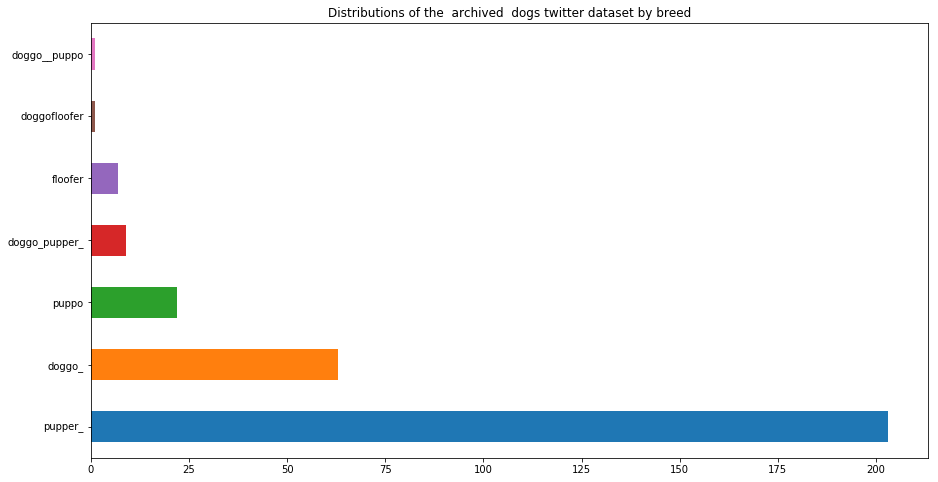

In [54]:
# Exclude the dogs without Breed names
data = df.breed.value_counts()[1:]
x = data.index
y = data.values
plot = data.plot(x = x, y= y, kind='barh', 
    title = 'Distributions of the  archived  dogs twitter dataset by breed',
              figsize=(15,8))
plot

In [55]:

df['retweet_count'] = df['retweet_count'].astype('int')
df['favorite_count'] = df['favorite_count'].astype('int')

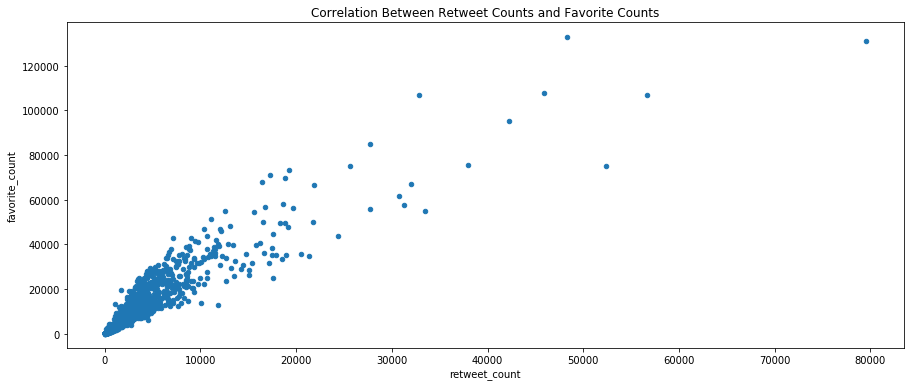

In [56]:
df.plot.scatter(x= "retweet_count", y = "favorite_count", figsize=(15,6),
                    title="Correlation Between Retweet Counts and Favorite Counts")

In [57]:
df[df.retweet_count < 10000].count()
df[df.favorite_count < 30000].count()

tweet_id              1887
timestamp             1887
source                1887
text                  1887
expanded_urls         1887
rating_numerator      1887
rating_denominator    1887
name                  1887
breed                 1887
jpg_url               1887
img_num               1887
p1                    1887
p1_conf               1887
p1_dog                1887
p2                    1887
p2_conf               1887
p2_dog                1887
p3                    1887
p3_conf               1887
p3_dog                1887
retweet_count         1887
favorite_count        1887
dtype: int64

In [58]:
df.shape

(1994, 22)

In [59]:
1887/1994

0.9463390170511534